## 911 Calls Capstone Project
For this Capstone project I will be analyzing some 911 call data from Kaggle.

Data contains the following fields:
    * lat: String variable, Lattitude
    * lng: String variable, Longitude
    *desc: String variable, Description of the Emergency Call
    *zip: String variable, Zipcode
    *title: String variable, Title
    *timeStamp: String variable, YYYY-MM-DD HH:MM:SS
    *twp: String variable, Address
    *e: String variable, Dummy variable(always 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
callsdata = r'C:\Users\desan\OneDrive\Documents\DATA\DATAANALYTICS\DATAPROJECTS\911 calls Capstone Project/911.csv'

In [9]:
df = pd.read_csv(callsdata)

### Check the Info() of the DF

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Check the head of the DF

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### Basic Questions

#### What are the top 5 zipcodes for 911 calls?

In [17]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?

In [16]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

#### How many unique title codes are there?

In [20]:
len(df['title'].unique())

148

In [21]:
df['title'].nunique()

148

### Fixing Title column creating a feature named Reason

In [22]:
x = df['title'].iloc[0]

In [23]:
x.split(':')[0]

'EMS'

In [25]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [26]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

#### What is the most common Reason for a 911 call based off of this new column?

In [30]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### Creating a countplot using Seaborn

<AxesSubplot:xlabel='Reason', ylabel='count'>

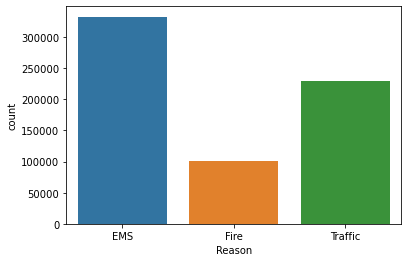

In [31]:
sns.countplot(x='Reason',data=df)

### What is the data type of the objects in the timeStamp Column?

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [34]:
type(df['timeStamp'].iloc[0])

str

### Convert column from string to Datetime object

In [35]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [36]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Specific attributes from a Datetime object ( calling them)

In [37]:
time = df['timeStamp'].iloc[0]
time.hour

17

#### Separate the Datetime column into 3 new columns called, Hour, Month, and Day of Week.

In [42]:
time.dayofweek

3

In [43]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [53]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [55]:
# another way to do that

# df['Month'] = time.month
# df['Day of Week'] = time.dayofweek

In [56]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


### Day of Week is an Integer 0-6. Lets change it with .map() to map the actual string names.

In [57]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [58]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


### Countplot of Day of Week

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

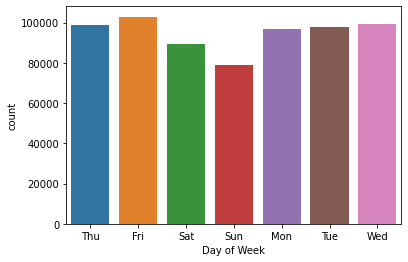

In [60]:
sns.countplot(x='Day of Week',data=df)

#### Countplot - Day of Week with HUE based off of the Reason column

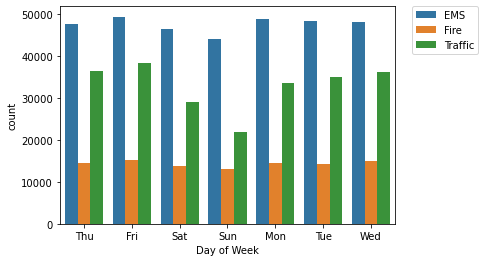

In [64]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
# We can relocate the Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Countplot - Month Column

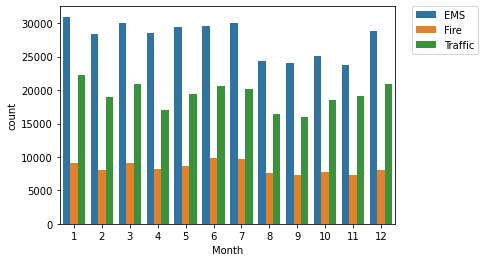

In [65]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Groupby object called byMonth, and use the count() method for aggregation.

In [67]:
byMonth = df.groupby('Month').count()

In [86]:
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


<AxesSubplot:xlabel='Month'>

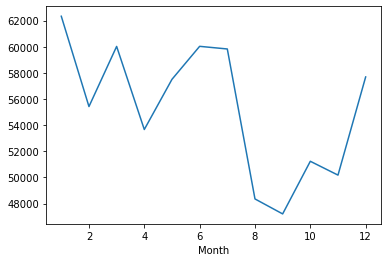

In [69]:
byMonth['lat'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


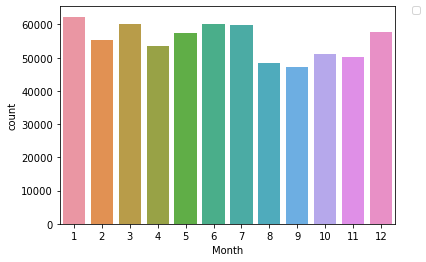

In [71]:
sns.countplot(x='Month',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Using implot() to create a linear fit on the number of calls per month

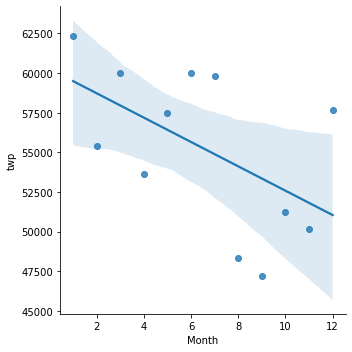

In [75]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
# We have to reset the index because there's not Month column in byMonth
# That would make Month into a new column.
# byMonth.reset_index()

### Let's explore more into the Date's information

#### Creating Date column with timeStamp column, using .date() method

In [78]:
t = df['timeStamp'].iloc[0]

In [79]:
t

Timestamp('2015-12-10 17:10:52')

In [81]:
t.date()
# with this we get the Date Object

datetime.date(2015, 12, 10)

In [82]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [83]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


#### Groupby Date column using count() aggregate and create a plot of counts of 911

In [88]:
df.groupby('Date').count().head(7)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
2015-12-15,419,419,419,380,419,419,418,419,419,419,419,419,419
2015-12-16,376,376,376,343,376,376,376,376,376,376,376,376,376


In [92]:
df.groupby('Date').count()['lat']

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
             ... 
2020-07-25    318
2020-07-26    296
2020-07-27    329
2020-07-28    370
2020-07-29    217
Name: lat, Length: 1694, dtype: int64

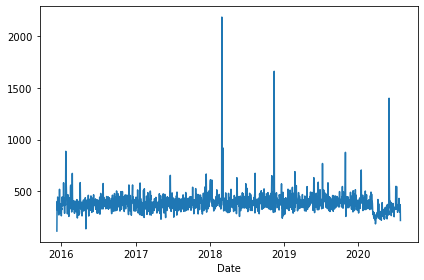

In [101]:
df.groupby('Date').count()['lat'].plot()
#There are values overlapping, so we can use
plt.tight_layout()

#### Recreating the plot into the 3 Reasons

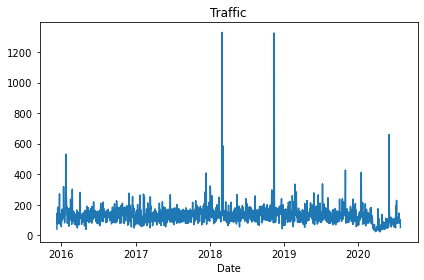

In [103]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

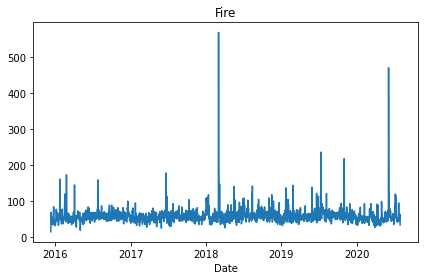

In [104]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

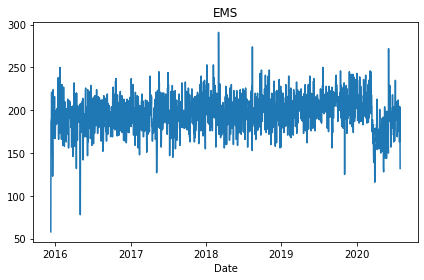

In [105]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

### Working withn seaborn HeatMaps 

#### Restructure the df. Column ----> Hours \ Index -----> Day of the Week
##### Let's try groupby with unstack method

##### Step 1:  groupby Multiple columns

In [108]:
df.groupby(by=['Day of Week', 'Hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                               
Fri         0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
            1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
            2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
            3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
            4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
            20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
            21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
            22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
            23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0       1983   1983  1983  
            1       1635   1635  1635  
            2       1449   1449  1449  
            3       1296   1296  1296  
            4       1339   1339  1339  
...                  ...    ...   ...  
Wed         19      4686   4686  4686  
            20      4116   4116  4116  
            21      3537   3537  3537  
            22      2826   2826  2826  
            23      2207   2207  2207  

[168 rows x 12 columns]

##### Step 2 and 3:  create Multi- level index, and unstack the index

In [111]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


##### Step 4: Lets store this into a DataFrame

In [112]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

#### HeatMap with NewDataFrame

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

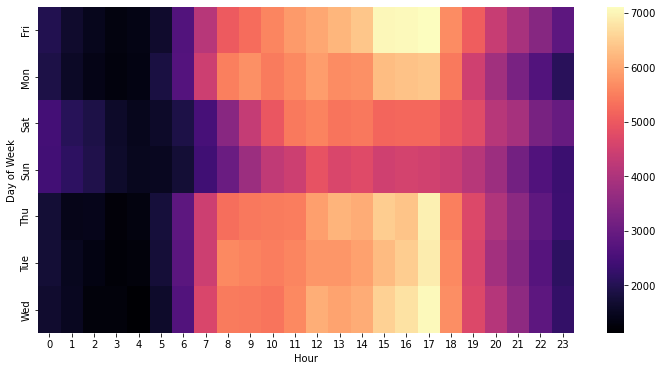

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='magma')

#### ClusterMap  with dayHour DataFrame

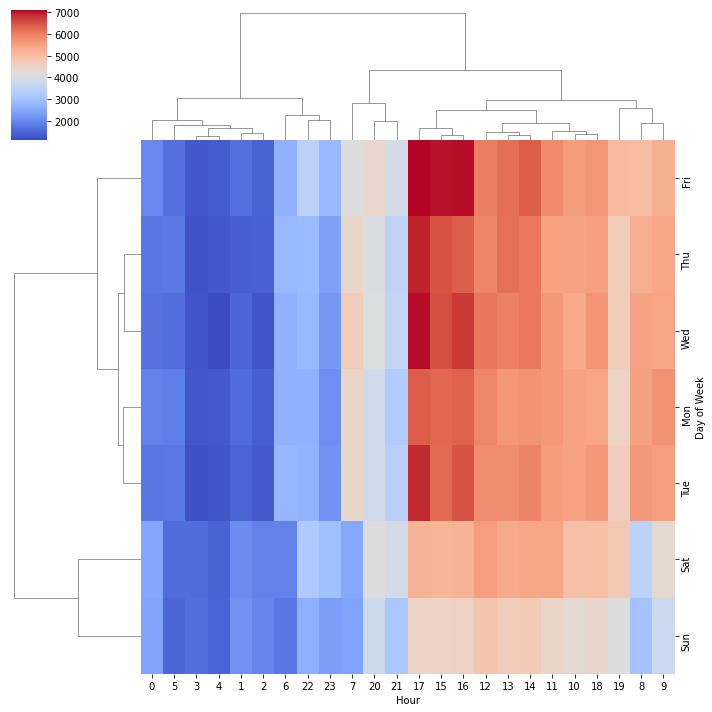

In [125]:
sns.clustermap(dayHour, cmap='coolwarm')

In [122]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

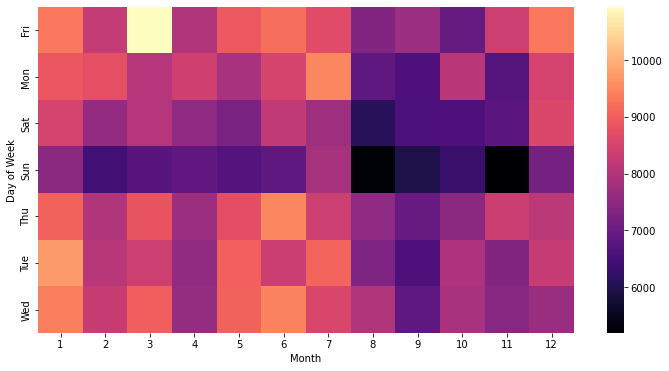

In [123]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='magma')

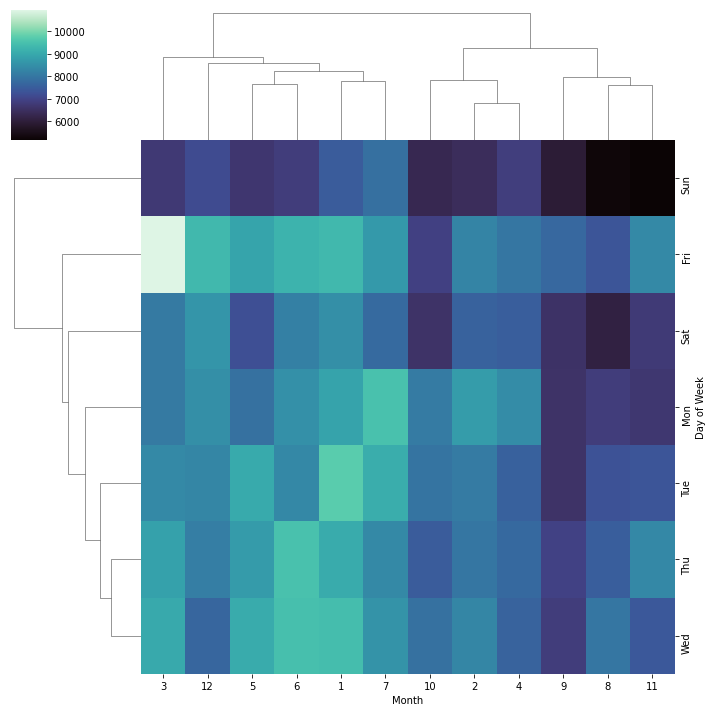

In [124]:
sns.clustermap(dayMonth, cmap='mako')